# Problem Statement


PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you.  The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean. Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target' . 1: Fraudulent transactions 0: Clean transactions

In [2]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Storing and Reading the data

geo = pd.read_csv(r'C:\Users\DELL\CAPSTONE PROJECTS\Banking Domain\Geo_scores.csv')
instance = pd.read_csv(r'C:\Users\DELL\CAPSTONE PROJECTS\Banking Domain\instance_scores.csv')
lambda_wts = pd.read_csv(r'C:\Users\DELL\CAPSTONE PROJECTS\Banking Domain\Lambda_wts.csv')
qset = pd.read_csv(r'C:\Users\DELL\CAPSTONE PROJECTS\Banking Domain\Qset_tats.csv')
test = pd.read_csv(r'C:\Users\DELL\CAPSTONE PROJECTS\Banking Domain\test_share.csv')
train = pd.read_csv(r'C:\Users\DELL\CAPSTONE PROJECTS\Banking Domain\train.csv')



In [4]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [5]:
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [6]:
lambda_wts.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [7]:
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [8]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [9]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [10]:
train["Target"].value_counts()
#

0    227451
1       394
Name: Target, dtype: int64

In [11]:
train["Target"].value_counts()/len(train)*100

0    99.827075
1     0.172925
Name: Target, dtype: float64

Highly imbalanced dataset

In [12]:
print("geo", geo.shape,"\n")
print("instance", instance.shape,"\n")
print("lambda_wts",lambda_wts.shape,"\n")
print("qset",qset.shape,"\n")
print('train', train.shape,"\n")
print("test", test.shape,"\n")

geo (1424035, 2) 

instance (1424035, 2) 

lambda_wts (1400, 2) 

qset (1424035, 2) 

train (227845, 28) 

test (56962, 27) 



In [13]:
train.shape[0]+test.shape[0]

284807

In [14]:
#Firstly we need to join all the tables and then proceed
#Finding the unique numbers of Id column and group column

print(geo["id"].nunique(),"\n")
print(instance["id"].nunique(),"\n")
print(qset["id"].nunique(),"\n")
print(train["id"].nunique(),"\n")
print(test["id"].nunique(),"\n")

#We can see that the sum of no. of rows of test and train data set are equal to sum of unique id's in train and test data set
#The sum of unique id's of train and test data == no. of unique id's of Geo, Instance, and qset which can be used to merge

284807 

284807 

284807 

227845 

56962 



In [15]:
print(lambda_wts["Group"].nunique(),"\n")
print(train["Group"].nunique(),"\n")
print(test["Group"].nunique(),"\n")

#May be due to presence of repeitive groups in train and test the sum of unique words doesn't match the no. of unique groups
#in lambda_wts.....Let's concat the train and test data and see what happens

1400 

1301 

915 



In [16]:
#Checking for null values

print(geo.isna().sum())
print()
print(instance.isna().sum())
print()
print(lambda_wts.isna().sum())
print()
print(qset.isna().sum())
print()
print(train.isna().sum())
print()
print(test.isna().sum())

id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              

In [17]:
#Filling null values with median 

geo["geo_score"] = geo["geo_score"].fillna(geo["geo_score"].median())
qset["qsets_normalized_tat"] = qset["qsets_normalized_tat"].fillna(qset["qsets_normalized_tat"].median())

print(geo.isna().sum())
print()
print(qset.isna().sum())

id           0
geo_score    0
dtype: int64

id                      0
qsets_normalized_tat    0
dtype: int64


In [18]:
train["identifier"] = 'train'
test["identifier"] = 'test'

In [19]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,identifier
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [20]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,identifier
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [21]:
#Concatinating the train and test data

all_data = pd.concat(objs=[train,test], axis=0)
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,identifier
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [22]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,identifier
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [23]:
all_data.shape

(284807, 29)

In [24]:
all_data["id"].nunique()

284807

In [25]:
all_data["Group"].nunique()

1400

In [26]:
#We have shape of geo as (1424035, 2) but unique values as 284807 so that means we have many id's repeating. The same is the case with instance and qset
#Now we can find the mean of all the repitive id's so that we can get a shape of 284807,2. We cannot use sum instead of mean because it's not logical.
#Sum is used only when you have some monetory value and based on situations
geo= geo.groupby(by="id").mean()
instance= instance.groupby(by="id").mean()
qset= qset.groupby(by="id").mean()

In [27]:
print("geo", geo.shape,"\n")
print("instance", instance.shape,"\n")
print("qset",qset.shape,"\n")

geo (284807, 1) 

instance (284807, 1) 

qset (284807, 1) 



In [28]:
#Now we can merge lambda_wts and all_data as the no. of unique groups is the same
#Also merge all_data with the rest of the data sets on id column

all_data = all_data.merge(right=lambda_wts, how="left",on="Group")
all_data = all_data.merge(right=geo, how="left",on="id")
all_data = all_data.merge(right=qset, how="left",on="id")
all_data = all_data.merge(right=instance, how="left",on="id")


In [29]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,identifier,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.700,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.140,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,-0.430,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,-0.302,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.630,-0.47


In [30]:
all_data.shape

(284807, 33)

In [31]:
all_data.isna().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
identifier                  0
lambda_wt                   0
geo_score                   0
qsets_normalized_tat        0
instance_scores             0
dtype: int

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284807 non-null  int64  
 1   Group                 284807 non-null  object 
 2   Per1                  284807 non-null  float64
 3   Per2                  284807 non-null  float64
 4   Per3                  284807 non-null  float64
 5   Per4                  284807 non-null  float64
 6   Per5                  284807 non-null  float64
 7   Per6                  284807 non-null  float64
 8   Per7                  284807 non-null  float64
 9   Per8                  284807 non-null  float64
 10  Per9                  284807 non-null  float64
 11  Dem1                  284807 non-null  float64
 12  Dem2                  284807 non-null  float64
 13  Dem3                  284807 non-null  float64
 14  Dem4                  284807 non-null  float64
 15  

In [33]:
train_data = all_data[all_data["identifier"]=='train']
test_data = all_data[all_data["identifier"]=="test"]

In [34]:
train_data.shape

(227845, 33)

In [35]:
test_data.shape

(56962, 33)

In [36]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'identifier', 'lambda_wt', 'geo_score',
       'qsets_normalized_tat', 'instance_scores'],
      dtype='object')

<Axes: >

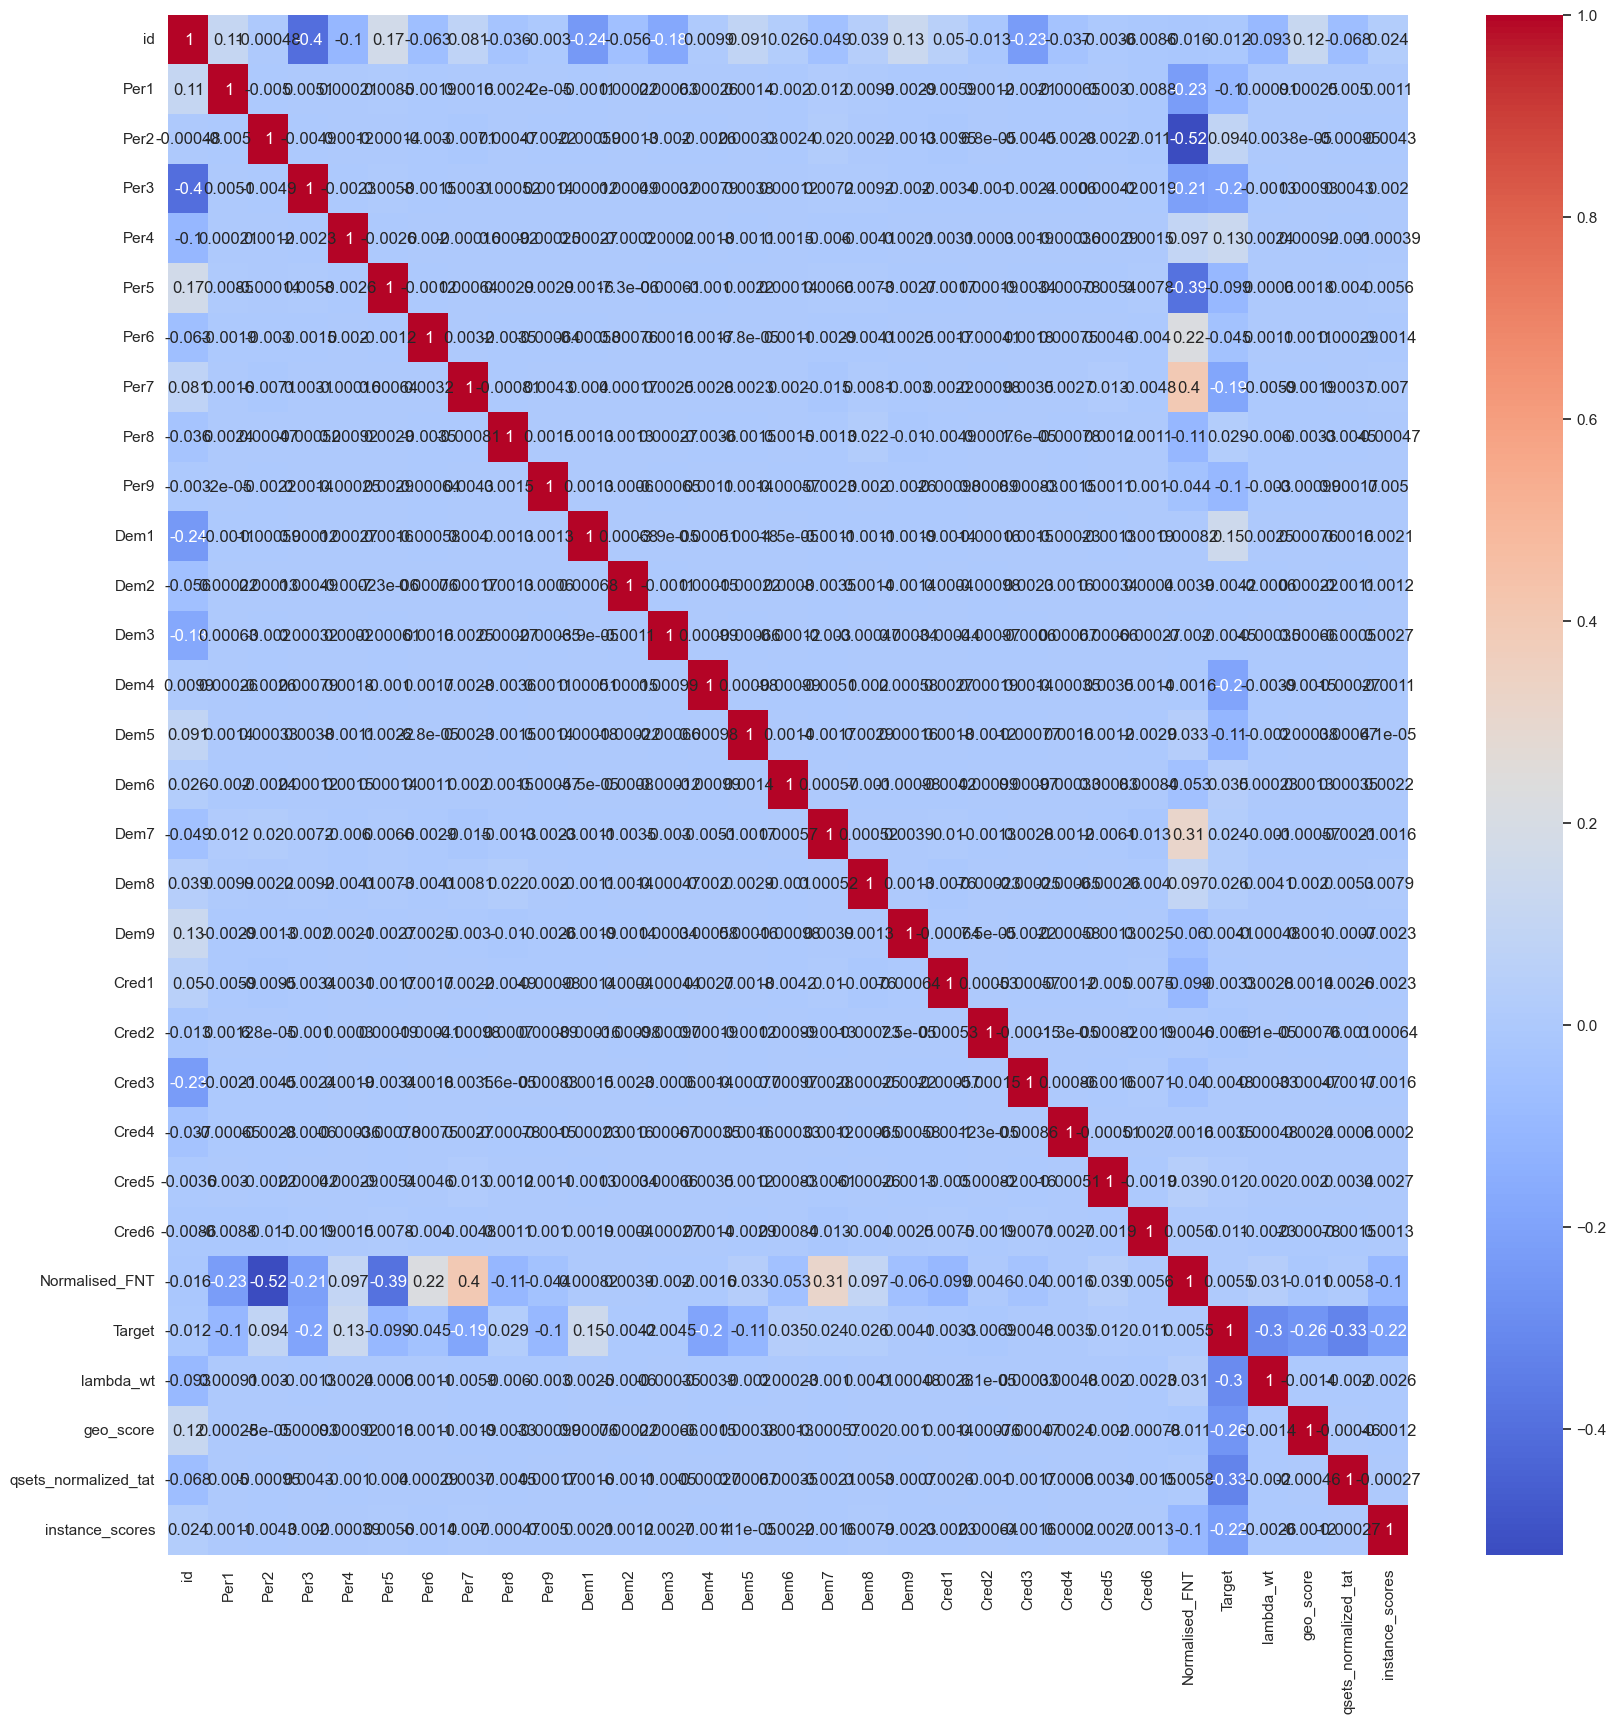

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True, cmap='coolwarm')

In [38]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'identifier', 'lambda_wt', 'geo_score',
       'qsets_normalized_tat', 'instance_scores'],
      dtype='object')

In [39]:
#Dropping unwanted columns
#id and group are dropped because they dont provide much info as they are only used for merging.

train_data = train_data.drop(columns=["id",'identifier',"Group"], axis=1)
test_data = test_data.drop(columns=["id",'identifier',"Group",'Target'], axis=1)

In [40]:
#Splitting the train_data into X and y

X = train_data.drop("Target",axis=1)
y = train_data["Target"]

In [41]:
X.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,-0.13,0.256,-0.700,-0.06
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.66,-0.250,0.140,0.52
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.51,-0.950,-0.430,1.56
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.72,0.490,-0.302,0.70
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.60,0.850,-0.630,-0.47


In [42]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [43]:
print(X.shape)
print(y.shape)

(227845, 29)
(227845,)


In [44]:
X.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.000350,0.008908,0.001346,-0.000123
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.957957,0.997629,0.850169,1.091488
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-19.210000,-18.680000,-25.156000,-24.590000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.430000,-0.400000,-0.480000,-0.540000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.050000,0.150000,-0.066000,-0.090000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.490000,0.630000,0.400000,0.450000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,10.530000,7.850000,8.540000,23.750000


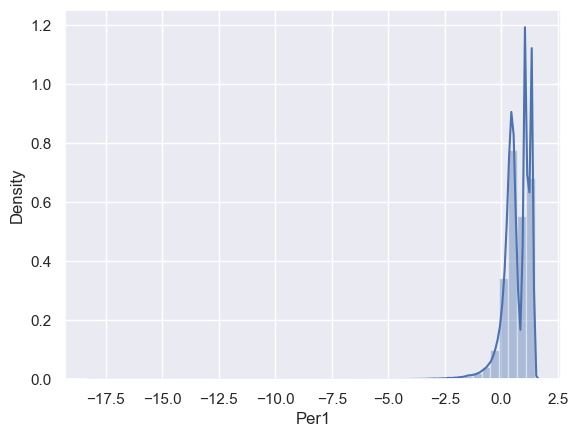

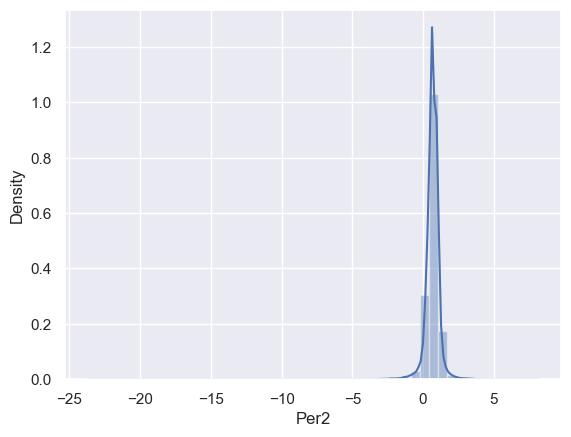

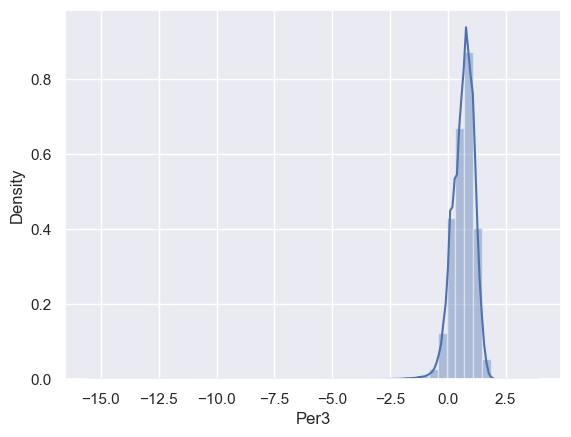

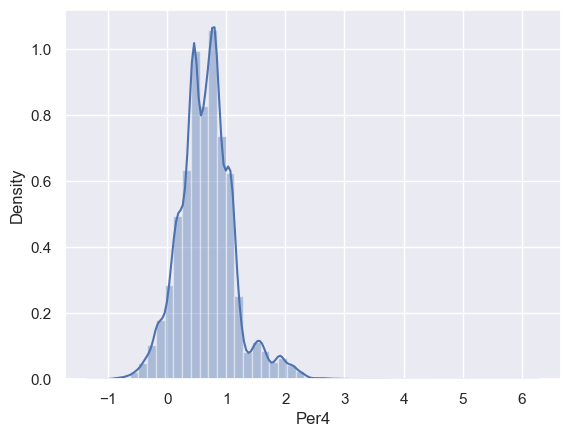

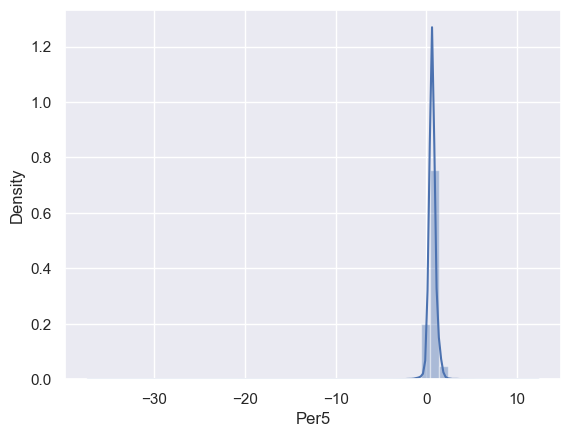

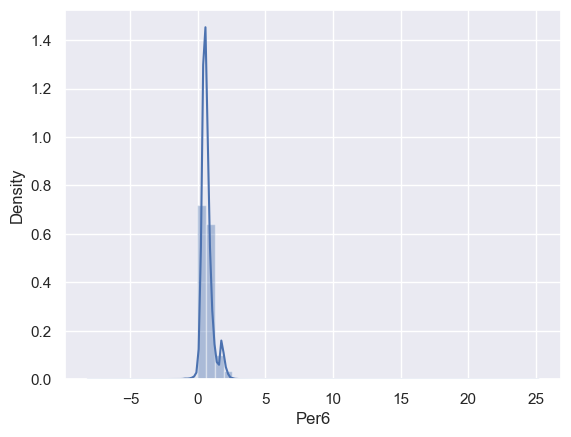

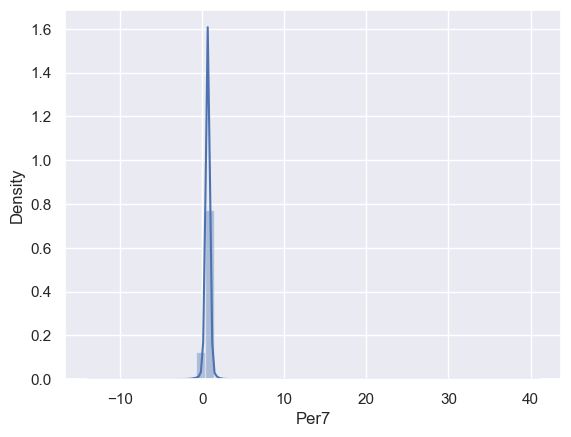

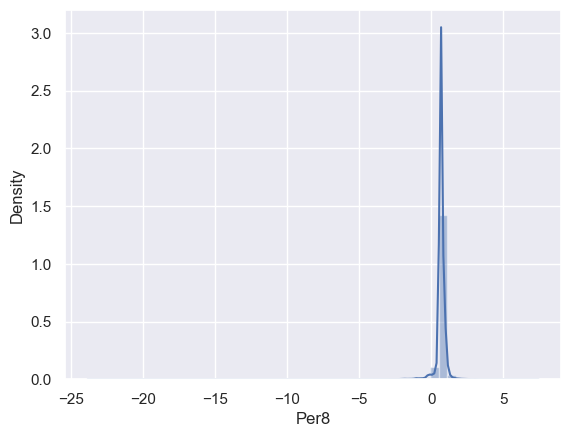

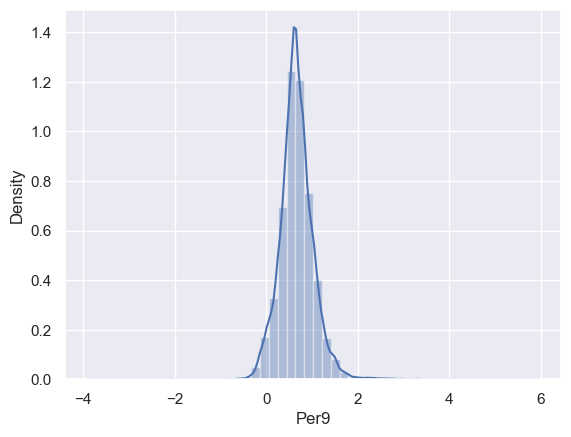

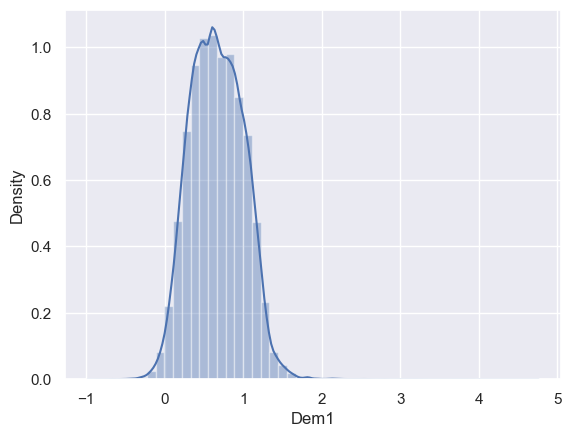

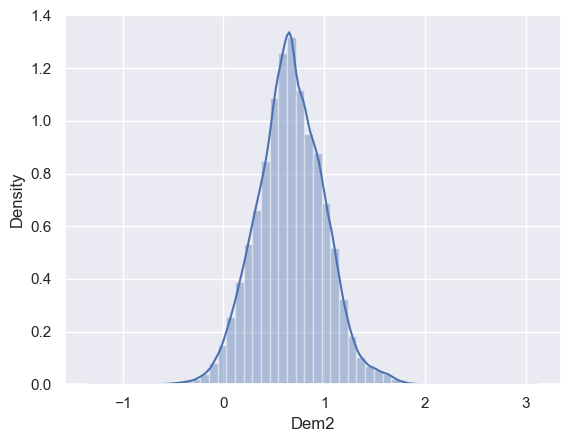

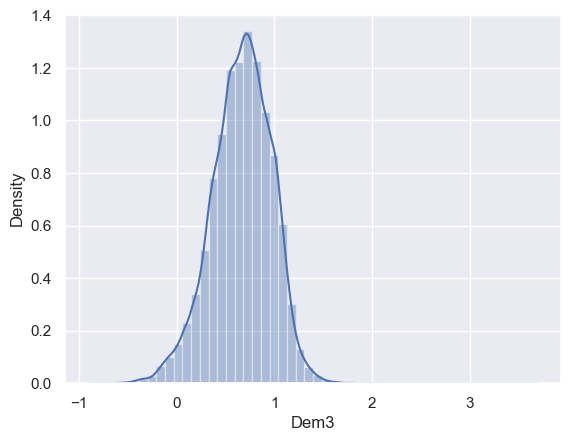

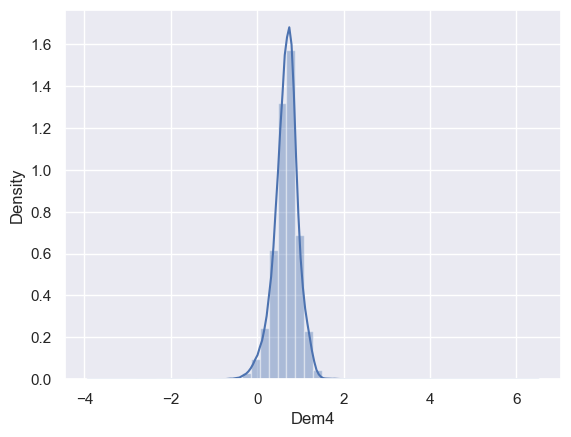

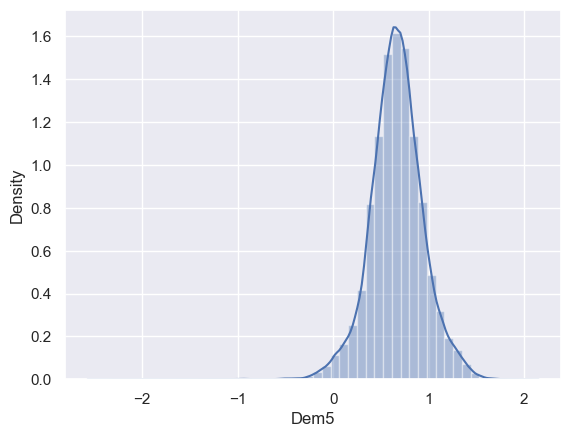

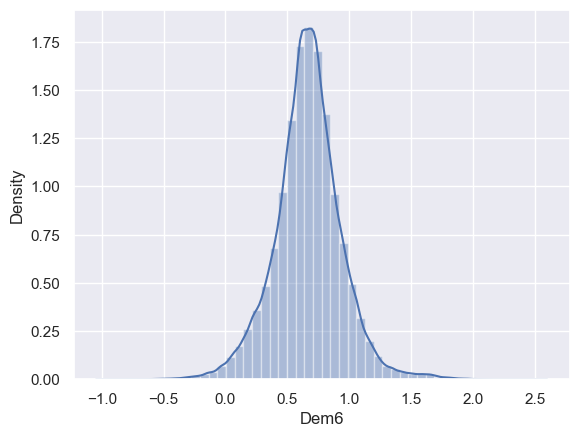

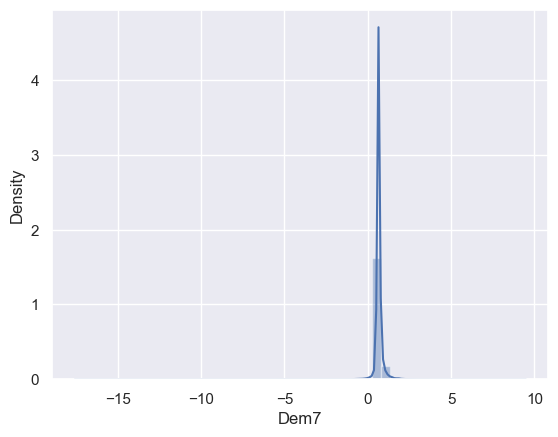

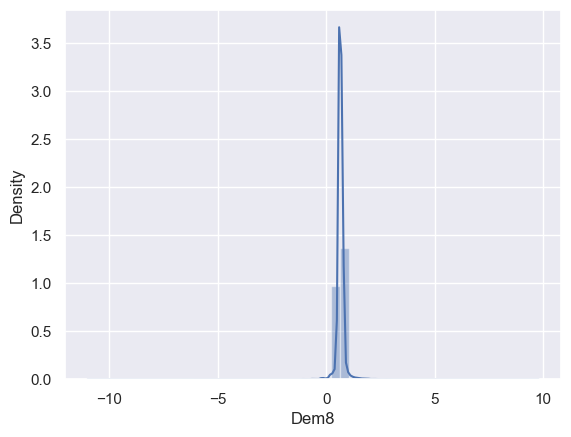

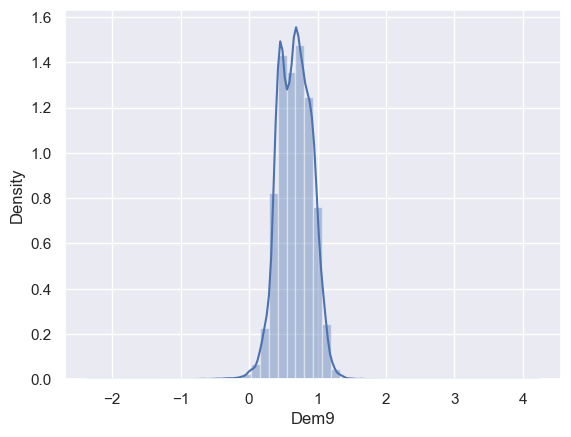

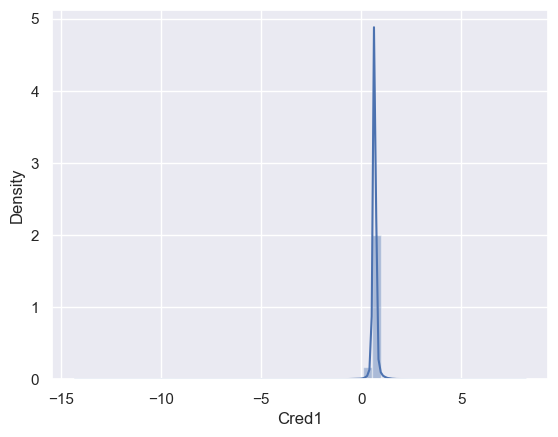

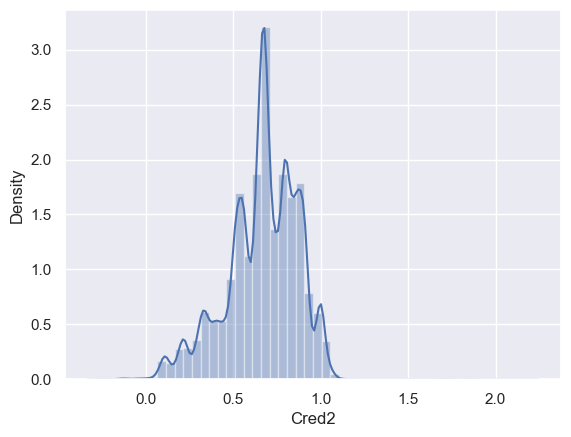

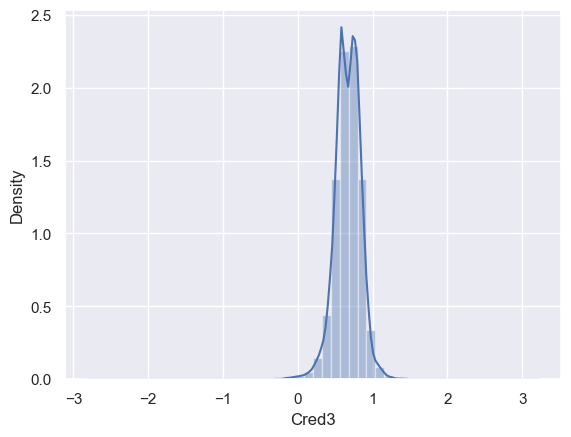

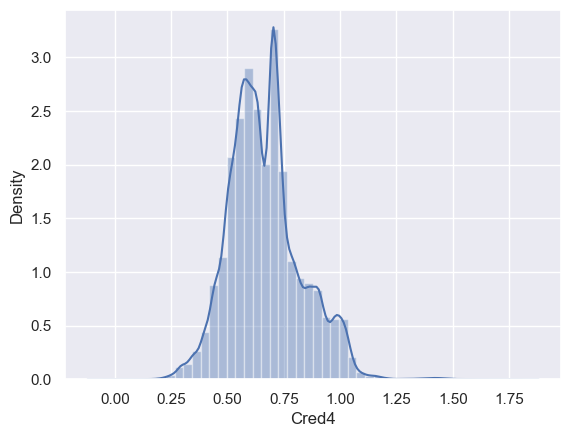

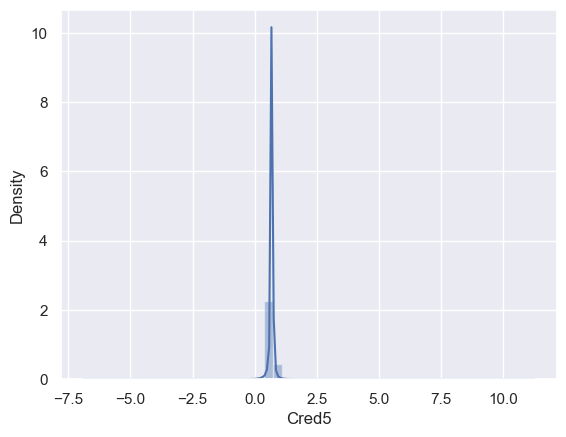

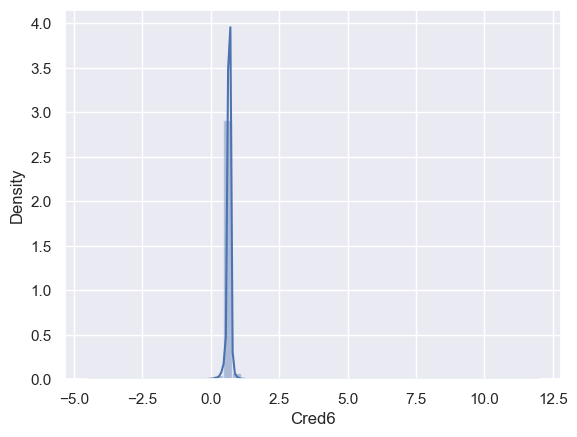

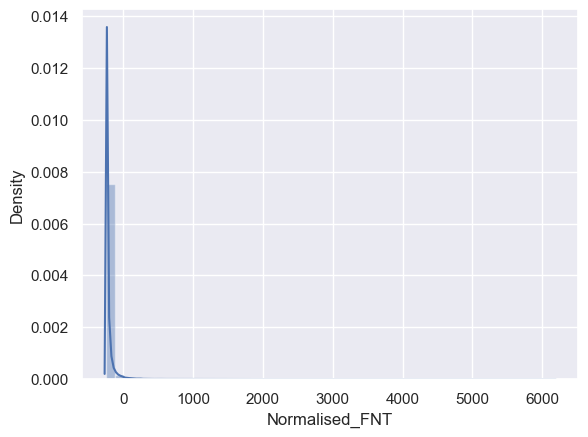

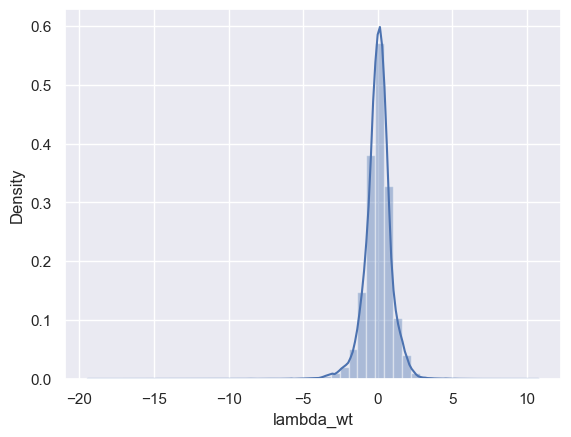

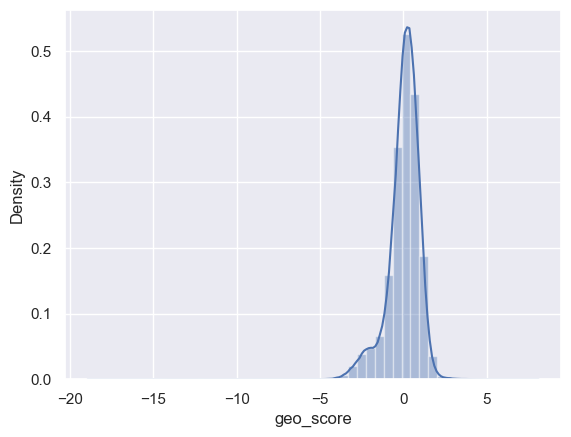

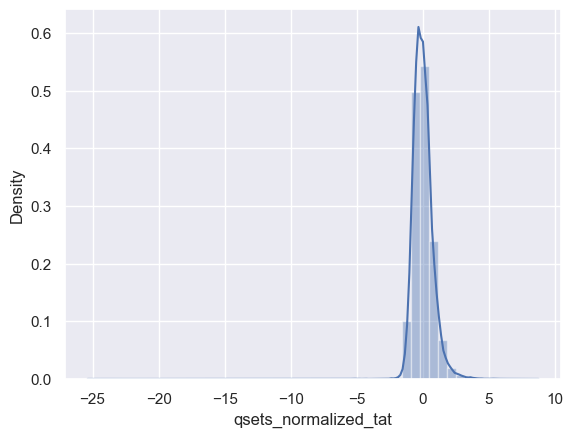

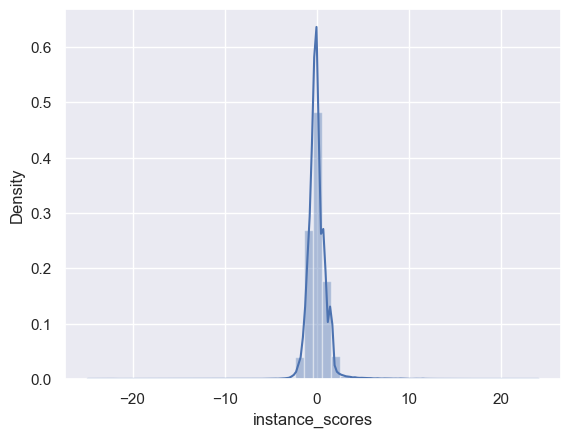

In [45]:
def distplot(col):
    sns.distplot(col)
    plt.show()
    
for i in X.columns:
    distplot(X[i])
    

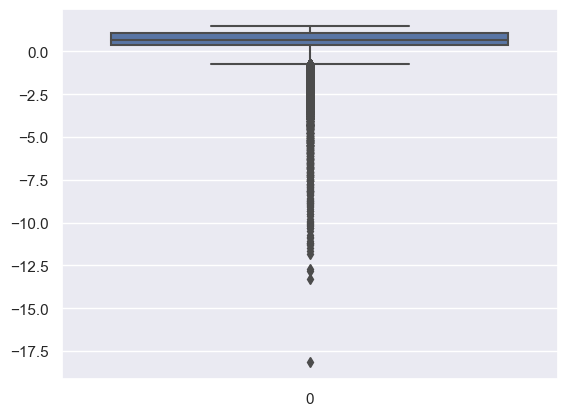

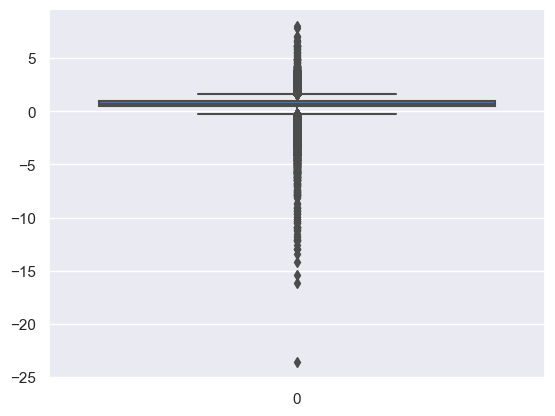

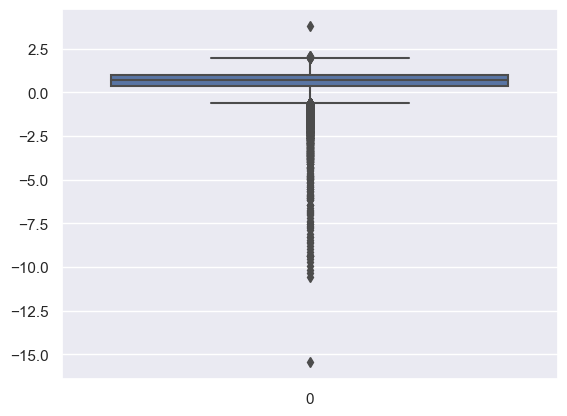

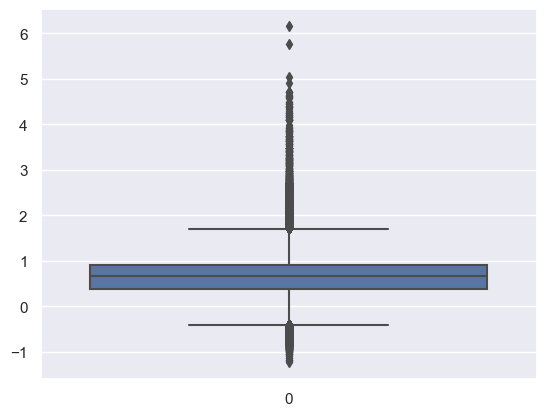

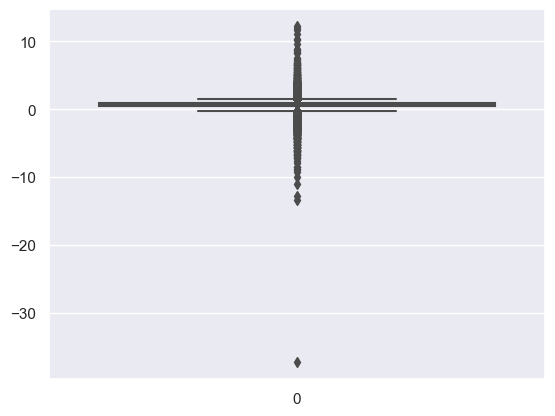

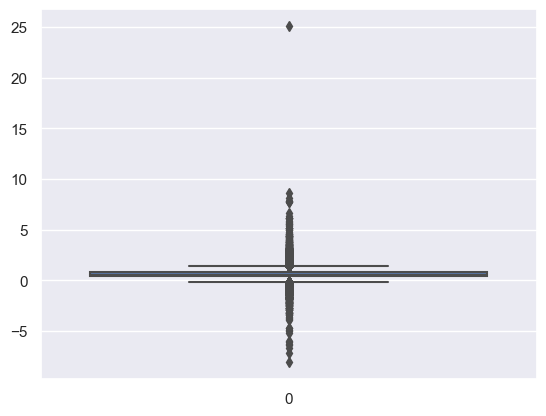

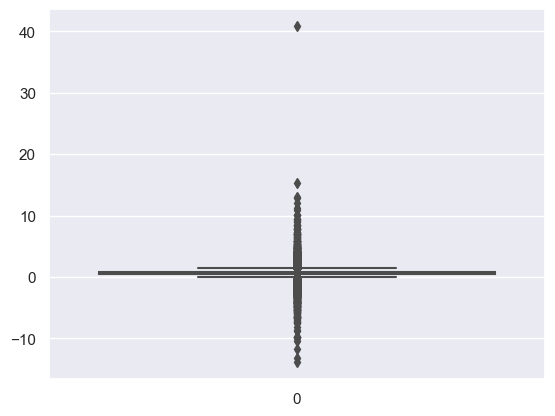

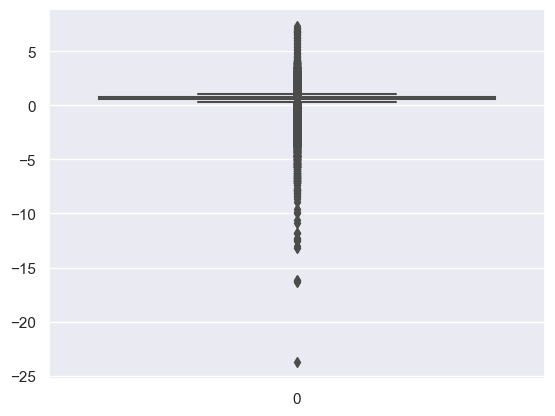

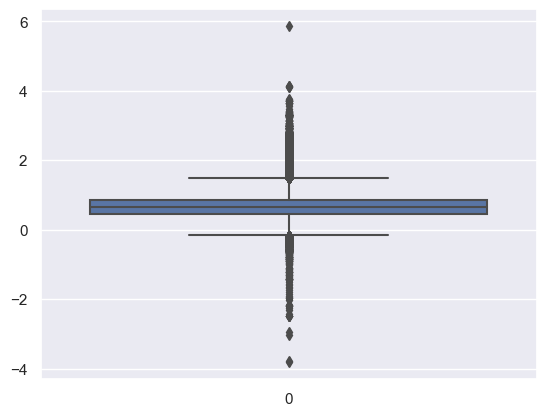

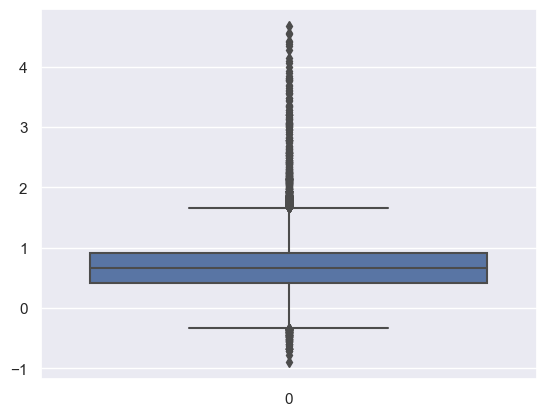

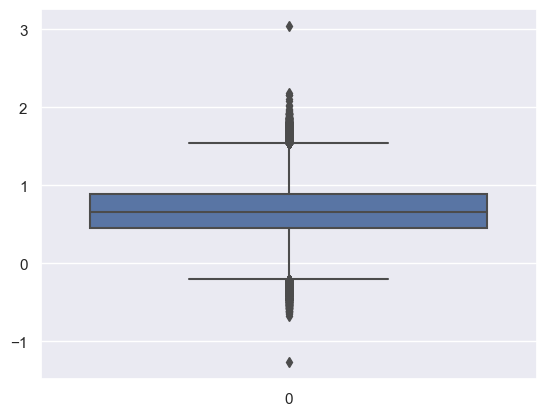

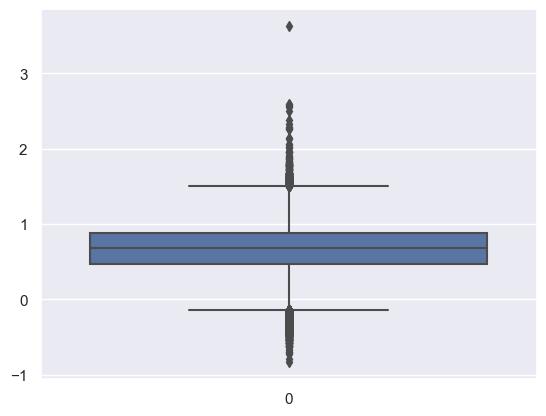

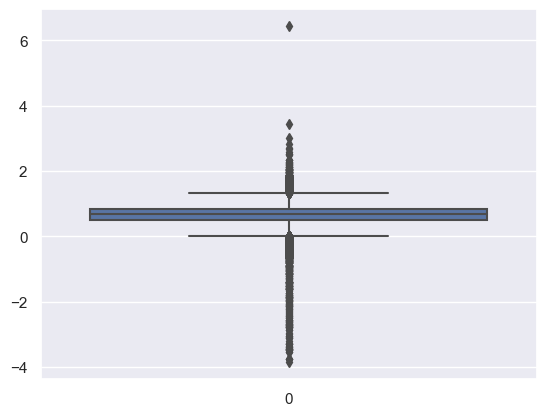

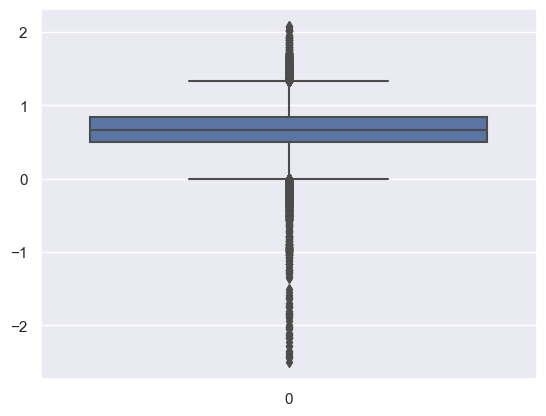

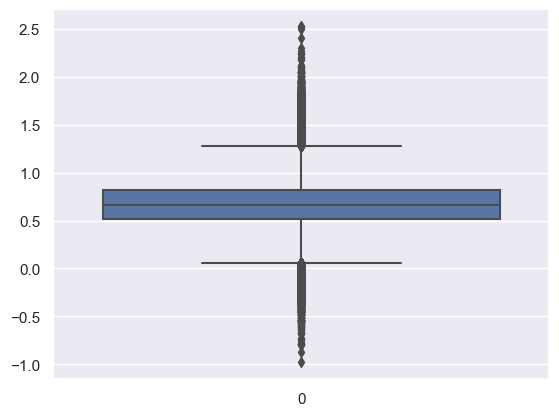

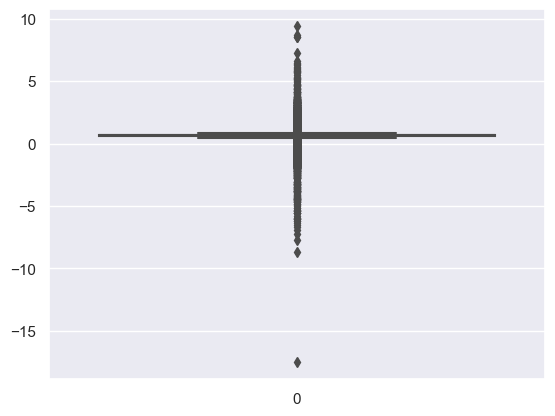

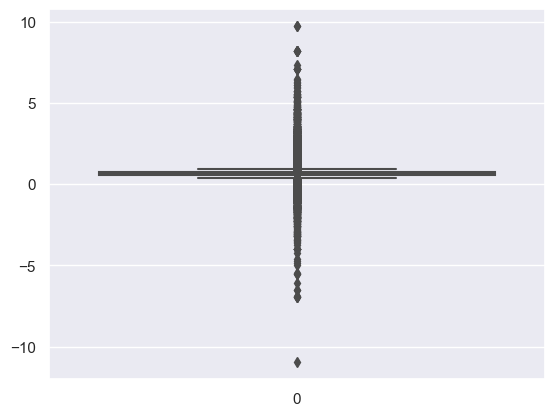

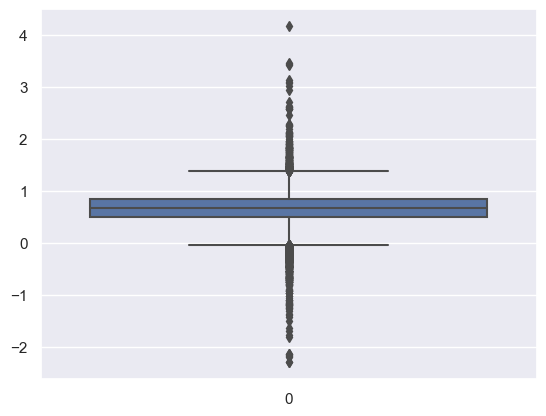

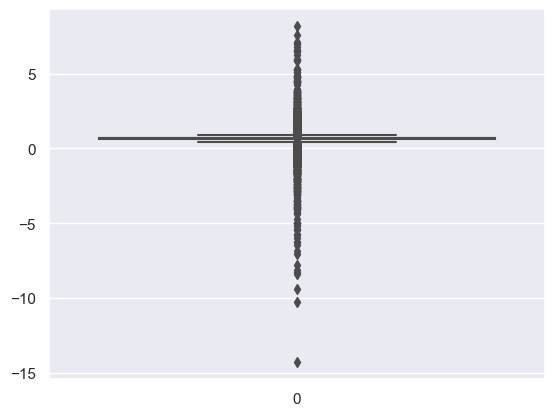

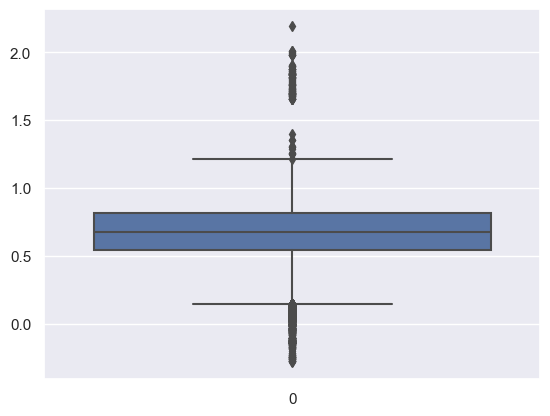

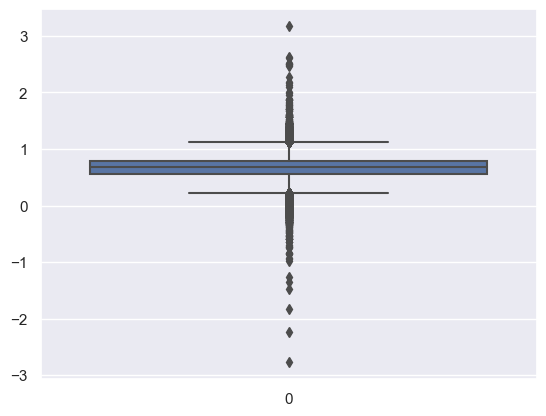

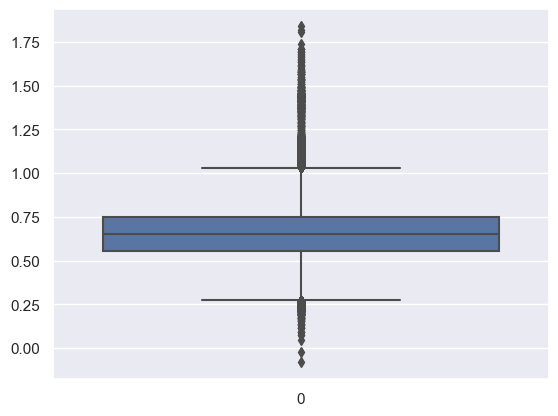

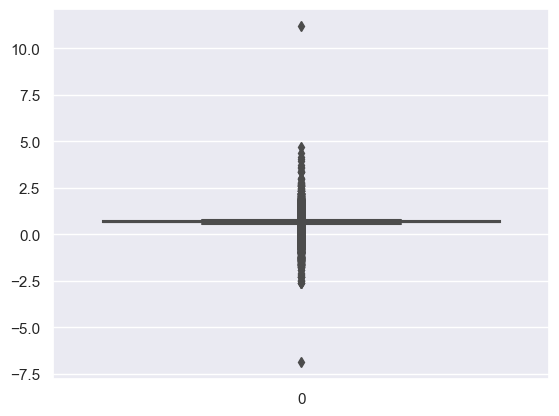

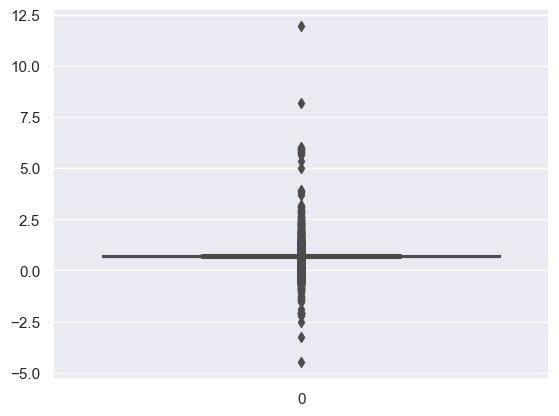

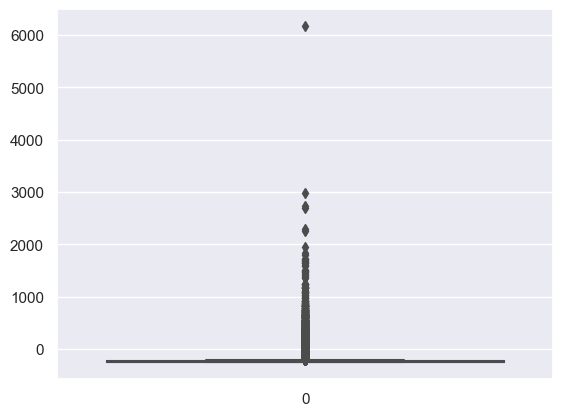

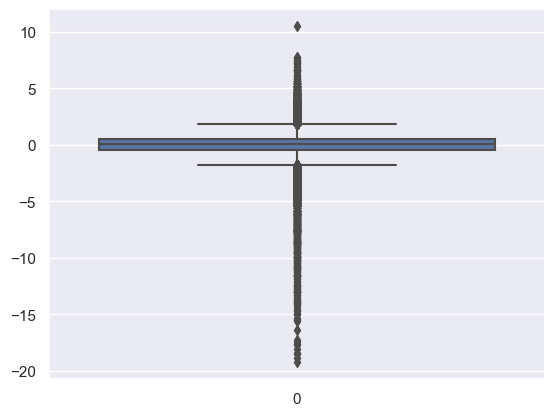

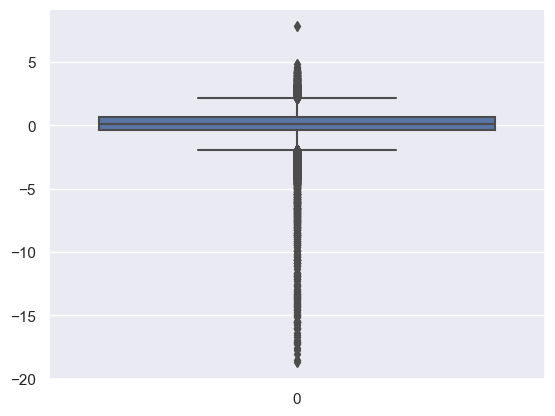

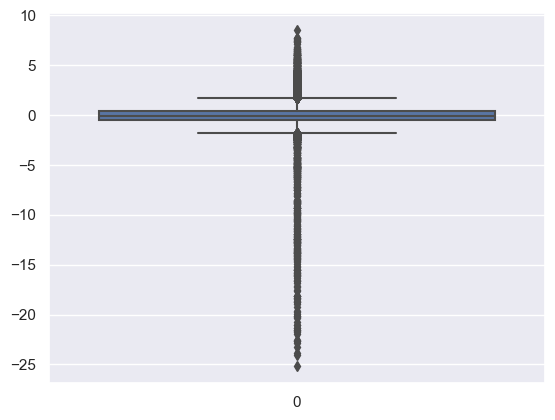

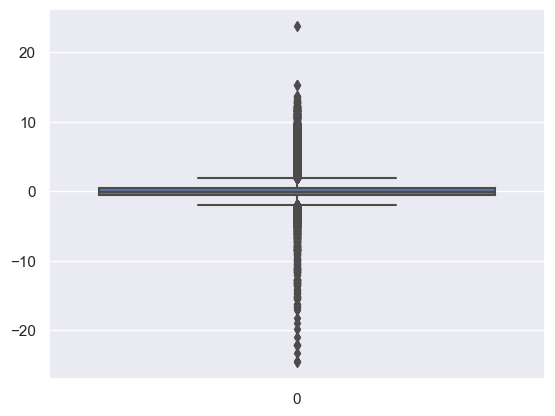

In [46]:
def boxplot(col):
    sns.boxplot(col)
    plt.show()
    
for i in X.columns:
    boxplot(X[i])

Note - No outliers are removed because according to the domain i.e banking Outliers are the ones that cause fraudulant transactions


In [47]:
#Outlier Capping
'''def capping(col):
    q5 = col.quantile(0.05)
    q95 = col.quantile(0.95)
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    
    def apply_cap (x):
    if x>upper:
        return q95
    elif x<lower:
        return q5
    else:
        return x
    
    return col.apply(apply_cap)

        
for col in X.columns:
    X[col] = capping(X[col])
    
'''
    

'def capping(col):\n    q5 = col.quantile(0.05)\n    q95 = col.quantile(0.95)\n    Q1 = col.quantile(0.25)\n    Q3 = col.quantile(0.75)\n    \n    IQR = Q3-Q1\n    \n    upper = Q3 + 1.5*IQR\n    lower = Q1 - 1.5*IQR\n    \n    def apply_cap (x):\n    if x>upper:\n        return q95\n    elif x<lower:\n        return q5\n    else:\n        return x\n    \n    return col.apply(apply_cap)\n\n        \nfor col in X.columns:\n    X[col] = capping(X[col])\n    \n'

In [48]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [49]:
#Carrying out train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify =y)
#stratify = y makes sure that both training and test data will have fraudulent transcations because there is a high possiblity 
#that the split will lead to training data having only non fraudulant data

In [50]:
y_train.value_counts()

0.0    181961
1.0       315
Name: Target, dtype: int64

In [51]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

In [52]:
X_train.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
225122,1.353333,0.570000,0.246667,0.763333,0.596667,0.330000,0.676667,0.583333,1.070000,0.256667,...,0.656667,0.760000,0.763333,0.656667,0.643333,-249.7500,0.27,0.06,0.074,-0.16
61988,0.646667,0.976667,0.176667,0.670000,1.000000,0.530000,0.916667,0.693333,-0.050000,0.083333,...,0.673333,0.430000,0.500000,0.810000,0.753333,-243.7500,0.71,-0.06,-0.040,0.81
197455,-2.083333,-1.453333,1.186667,2.273333,2.750000,-0.560000,-0.923333,-0.246667,0.820000,0.513333,...,0.916667,0.700000,0.716667,1.056667,1.113333,-236.8450,-0.52,0.90,0.150,2.10
116736,0.356667,1.100000,1.216667,1.160000,0.833333,0.373333,1.210000,0.593333,0.076667,0.506667,...,0.900000,0.906667,0.653333,0.650000,0.686667,-231.1725,0.42,-0.42,-0.570,-0.11
169019,-1.043333,2.173333,0.016667,1.023333,-0.040000,1.786667,-1.933333,-4.236667,0.406667,0.146667,...,0.880000,0.433333,0.700000,0.613333,0.883333,-246.1875,2.29,2.37,1.444,-2.00


In [53]:
X_train.shape

(182276, 29)

In [54]:
X_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
197832,1.196667,0.113333,0.116667,0.603333,0.393333,0.460000,0.640000,0.596667,0.546667,0.716667,...,0.550000,0.693333,0.653333,0.650000,0.660000,-176.250,0.71,-0.09,-0.456,0.86
111272,1.043333,0.480000,0.780000,0.816667,0.440000,0.620000,0.576667,0.616667,0.326667,0.276667,...,0.493333,0.760000,0.476667,0.680000,0.686667,-216.250,-0.13,0.17,-0.660,0.74
39995,-0.423333,0.220000,0.793333,-0.426667,-0.353333,0.813333,0.843333,0.840000,0.976667,0.953333,...,0.753333,0.766667,0.343333,0.663333,0.556667,-156.315,-0.06,1.44,0.610,-1.60
123646,0.996667,0.690000,0.716667,0.980000,0.753333,1.016667,0.533333,0.823333,0.843333,0.963333,...,0.436667,0.730000,0.840000,0.690000,0.676667,-247.325,-1.45,0.75,2.450,-0.97
82121,0.543333,0.686667,0.880000,-0.053333,1.050000,0.533333,0.920000,0.550000,0.050000,0.746667,...,0.340000,0.826667,0.593333,0.626667,0.620000,-246.250,-0.29,-0.26,-0.742,0.37


In [55]:
#Standardizing use standard scalar

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

test_data_scaled = ss.transform(test_data)

In [56]:
X_train_scaled

array([[ 1.04754157, -0.17779306, -0.82494866, ...,  0.05006948,
         0.0856697 , -0.14684283],
       [-0.02913858,  0.560911  , -0.96259847, ..., -0.07055203,
        -0.04789352,  0.74402902],
       [-4.18857745, -3.85314851,  1.02349177, ...,  0.89442009,
         0.17471185,  1.92879672],
       ...,
       [ 0.46857206, -1.27373925, -0.32023265, ..., -1.5823417 ,
         0.91282442,  1.16650432],
       [-1.25310044, -1.33428876,  1.35122944, ..., -0.25148431,
         0.62460904,  0.98281941],
       [ 0.32636902,  0.37926246, -0.64141556, ..., -0.23138072,
        -0.44623999,  0.41339617]])

In [57]:
X_train_scaled = pd.DataFrame(data = X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,1.047542,-0.177793,-0.824949,0.204378,-0.149742,-0.757684,0.024346,-0.207225,1.103771,-1.204505,...,-0.049641,0.536193,0.598158,-0.072444,-0.208046,-0.350536,0.283478,0.050069,0.085670,-0.146843
1,-0.029139,0.560911,-0.962598,0.006748,0.720318,-0.308625,0.598609,0.067148,-1.959285,-1.714148,...,0.032841,-1.357405,-1.038630,1.060957,0.769414,-0.254148,0.744535,-0.070552,-0.047894,0.744029
2,-4.188577,-3.853149,1.023492,3.401757,4.495372,-2.755992,-3.804072,-2.277489,0.420053,-0.449840,...,1.237067,0.191903,0.308094,2.884255,3.968375,-0.143222,-0.544329,0.894420,0.174712,1.928797
3,-0.470984,0.784944,1.082485,1.044308,0.360789,-0.660388,1.300486,-0.182282,-1.612868,-0.469441,...,1.154586,1.377792,-0.085564,-0.121722,0.177014,-0.052096,0.440656,-0.432417,-0.668845,-0.100922
4,-2.604029,2.734639,-1.277227,0.754920,-1.523142,2.512956,-6.220761,-12.229725,-0.710361,-1.527932,...,1.055608,-1.338277,0.204500,-0.392753,1.924595,-0.293306,2.400148,2.372034,1.690772,-1.836744


In [58]:
X_train_scaled.shape

(182276, 29)

In [59]:
X_test_scaled = pd.DataFrame(data = X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,0.808844,-1.007321,-1.080584,-0.134417,-0.588367,-0.465796,-0.063388,-0.173968,-0.327479,0.148012,...,-0.577521,0.153648,-0.085564,-0.121722,-0.059946,0.830211,0.744535,-0.100707,-0.535282,0.789950
1,0.575224,-0.341277,0.223812,0.317310,-0.487699,-0.106549,-0.214930,-0.124082,-0.929150,-1.145700,...,-0.857957,0.536193,-1.183662,0.100030,0.177014,0.187628,-0.135665,0.160639,-0.774290,0.679739
2,-1.659395,-0.813563,0.250031,-2.315410,-2.199057,0.327540,0.423140,0.432978,0.848516,0.843872,...,0.428751,0.574448,-2.012415,-0.023166,-0.978167,1.150458,-0.062315,1.437217,0.713651,-1.469374
3,0.504123,0.040185,0.099272,0.663163,0.188215,0.784082,-0.318616,0.391406,0.483867,0.873274,...,-1.138393,0.364048,1.074691,0.173948,0.088154,-0.311579,-1.518836,0.743643,2.869409,-0.890767
4,-0.186578,0.034130,0.420454,-1.524888,0.828177,-0.301141,0.606585,-0.290368,-1.685798,0.236219,...,-1.616784,0.918738,-0.458503,-0.294196,-0.415387,-0.294310,-0.303322,-0.271588,-0.870362,0.339922


In [60]:
test_data_scaled = pd.DataFrame(data = test_data_scaled,columns=test_data.columns)
test_data_scaled.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
0,-1.471484,1.584198,-0.877387,-2.004848,-0.207267,-0.914854,0.080177,1.023294,0.720889,-1.498530,...,0.725683,0.631829,0.805346,1.159514,1.035994,-0.350536,0.796928,0.241054,-0.500134,-0.036632
1,-0.049453,0.518526,0.282805,-0.423804,0.526173,-0.929822,0.893716,-0.290368,-0.336595,-0.685060,...,0.181307,0.803975,-0.230596,0.050752,0.058534,-0.351540,0.189171,0.421986,-0.727426,-0.707082
2,0.575224,0.131009,0.381126,0.719629,-0.178504,-0.114034,-0.087316,0.050519,-0.199851,1.716147,...,0.428751,1.167392,-0.437784,0.100030,0.028914,-0.324350,0.409221,1.316595,-0.476702,0.101132
3,0.940889,-0.668244,-0.176028,-0.063835,-0.883181,-0.278688,-0.741338,-0.007681,1.340793,1.529931,...,-0.297084,-1.204387,-2.157447,0.075391,-0.059946,0.079393,1.886698,-2.131170,0.437152,0.303185
4,0.793608,-0.619805,-0.372671,0.423183,-0.494890,0.028168,-0.454206,0.050519,2.215952,1.608338,...,1.138089,-0.573187,-0.748566,-0.121722,-0.030326,0.509401,1.981006,-2.131170,-0.153338,-0.339712


NOTE - WE HAVE NOT DROPPED ANY COLUMNS BECAUSE OF THE AMBIGUITY OF COLUMNS COZ WE DO NOT KNOW WHAT EACH COLUMN MEANS AS THIS IS A REAL TIME SENSITIVE DATA

# Model Building

In [61]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

y_pred_train_log = lr.predict(X_train_scaled)
y_pred_test_log = lr.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_log)}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_log)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_log)}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_log)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_log)}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_log)}")

Accuracy of training data set is 0.9991770721323707
Accuracy of testing data set is 0.9992319339902126

Confusin matrix of training data set is 
 [[181931     30]
 [   120    195]]
Confusin matrix of testing data set is 
[[45485     5]
 [   30    49]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.87      0.62      0.72       315

    accuracy                           1.00    182276
   macro avg       0.93      0.81      0.86    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.91      0.62      0.74        79

    accuracy                           1.00     45569
   macro avg       0.95      0.81      0.87     45569
weighted avg       1.00      1.00      1.00     45569



In [62]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train_scaled, y_train)

y_pred_train_tree = dtree.predict(X_train_scaled)
y_pred_test_tree = dtree.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_tree)}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_tree)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_tree)}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_tree)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_tree)}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_tree)}")

Accuracy of training data set is 1.0
Accuracy of testing data set is 0.999100265531392

Confusin matrix of training data set is 
 [[181961      0]
 [     0    315]]
Confusin matrix of testing data set is 
[[45469    21]
 [   20    59]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.74      0.75      0.74        79

    accuracy                           1.00     45569
   macro avg       0.87      0.87      0.87     45569
weighted avg       1.00      1.00      1.00     45569



In [63]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_rf )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_rf)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_rf )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_rf)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_rf )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_rf)}")

Accuracy of training data set is 1.0
Accuracy of testing data set is 0.9994952709078541

Confusin matrix of training data set is 
 [[181961      0]
 [     0    315]]
Confusin matrix of testing data set is 
[[45487     3]
 [   20    59]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.75      0.84        79

    accuracy                           1.00     45569
   macro avg       0.98      0.87      0.92     45569
weighted avg       1.00      1.00      1.00     45569



In [64]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_scaled,y_train)

y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_knn )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_knn)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_knn )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_knn)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_knn )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_knn)}")

Accuracy of training data set is 0.9995720775088328
Accuracy of testing data set is 0.9994074919353069

Confusin matrix of training data set is 
 [[181953      8]
 [    70    245]]
Confusin matrix of testing data set is 
[[45483     7]
 [   20    59]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.97      0.78      0.86       315

    accuracy                           1.00    182276
   macro avg       0.98      0.89      0.93    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.89      0.75      0.81        79

    accuracy                           1.00     45569
   macro avg       0.95      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [65]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled,y_train)

y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_svm )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_svm)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_svm )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_svm)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_svm )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_svm)}")

Accuracy of training data set is 0.9996379117382431
Accuracy of testing data set is 0.9993197129627598

Confusin matrix of training data set is 
 [[181955      6]
 [    60    255]]
Confusin matrix of testing data set is 
[[45488     2]
 [   29    50]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.98      0.81      0.89       315

    accuracy                           1.00    182276
   macro avg       0.99      0.90      0.94    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.96      0.63      0.76        79

    accuracy                           1.00     45569
   macro avg       0.98      0.82      0.88     45569
weighted avg       1.00      1.00      1.00     45569



In [66]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

nb.fit(X_train_scaled,y_train)

y_pred_train_nb = nb.predict(X_train_scaled)
y_pred_test_nb = nb.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_nb )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_nb)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_nb )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_nb)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_nb )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_nb)}")

Accuracy of training data set is 0.9991496412034497
Accuracy of testing data set is 0.9991222102745287

Confusin matrix of training data set is 
 [[181918     43]
 [   112    203]]
Confusin matrix of testing data set is 
[[45480    10]
 [   30    49]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.83      0.64      0.72       315

    accuracy                           1.00    182276
   macro avg       0.91      0.82      0.86    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.83      0.62      0.71        79

    accuracy                           1.00     45569
   macro avg       0.91      0.81      0.85     45569
weighted avg       1.00      1.00      1.00     45569



In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_scaled, y_train)

y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_test_xgb = xgb.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_xgb )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_xgb)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_xgb )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_xgb)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_xgb )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_xgb)}")

Accuracy of training data set is 1.0
Accuracy of testing data set is 0.9995391603941276

Confusin matrix of training data set is 
 [[181961      0]
 [     0    315]]
Confusin matrix of testing data set is 
[[45487     3]
 [   18    61]]

Classification report of training data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report of testing data set is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.77      0.85        79

    accuracy                           1.00     45569
   macro avg       0.98      0.89      0.93     45569
weighted avg       1.00      1.00      1.00     45569



In [ ]:
#Stacking method - is used when the metrics of all other models is greater than 75%

estimators = [("dtree",dtree),("RandomForest",rf),("Knn",knn),("SVM",svm),("xgb",xgb),("Naivebayes",nb)]

from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=estimators, final_estimator=lr, cv=10)

sc.fit(X_train_scaled, y_train)


y_pred_train_sc = sc.predict(X_train_scaled)
y_pred_test_sc = sc.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_sc )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_sc)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_sc )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_sc)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_sc )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_sc)}")


In [ ]:
#Voting Method - is used when the metrics of all other models is less than 75%

from sklearn.ensemble import VotingClassifier

estimators = [("dtree",dtree),("RandomForest",rf),("Knn",knn),("SVM",svm),("xgb",xgb),("Naivebayes",nb)]

vc = VotingClassifier(estimators=estimators)

vc.fit(X_train_scaled, y_train)


y_pred_train_vc = vc.predict(X_train_scaled)
y_pred_test_vc = vc.predict(X_test_scaled)

print(f"Accuracy of training data set is {accuracy_score(y_train, y_pred_train_vc )}")
print(f"Accuracy of testing data set is {accuracy_score(y_test, y_pred_test_vc)}")

print()

print(f"Confusin matrix of training data set is \n {confusion_matrix(y_train, y_pred_train_vc )}")
print(f"Confusin matrix of testing data set is \n{confusion_matrix(y_test, y_pred_test_vc)}")

print()

print(f"Classification report of training data set is \n{classification_report(y_train, y_pred_train_vc )}")
print(f"Classification report of testing data set is \n{classification_report(y_test, y_pred_test_vc)}")



In [ ]:
#Visualization of all the model performances

perf = pd.DataFrame(data = {"Methods":["Logistic","Decision Tree","KNN","Random Forest","SVM", "Naive Bayes",'Xgboost',"Stacking", "Voting"],
                           "Accuracy":[accuracy_score(y_test, y_pred_test_log),accuracy_score(y_test, y_pred_test_tree),accuracy_score(y_test, y_pred_test_knn),accuracy_score(y_test, y_pred_test_rf),accuracy_score(y_test, y_pred_test_svm),accuracy_score(y_test, y_pred_test_nb),accuracy_score(y_test, y_pred_test_xgb),accuracy_score(y_test, y_pred_test_sc),accuracy_score(y_test, y_pred_test_vc)]})
perf.head()

In [96]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [ ]:
394/(394+227451)

In [95]:
#Isolation Forest---Unsupervised ML algorithm

from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

iso_f = IsolationForest(contamination = (394/(394+227451)))#Contamination is the ratio of outliers in the entire data set i.e fraud detections

iso_f.fit(X_train_scaled)

y_pred_train_iso_f = iso_f.predict(X_train_scaled)
y_pred_test_iso_f = iso_f.predict(X_test_scaled)

# Count the number of anomalies detected in the test set
anomaly_counts_test = pd.DataFrame(y_pred_test_iso_f)
print(anomaly_counts_test.value_counts())

#Accuracy

#print(f"Accuracy of training data set is {accuracy_score(-1*y_train, y_pred_train_iso_f )}")
#print(f"Accuracy of testing data set is {accuracy_score(-1*y_test, y_pred_test_iso_f)}")

#I adjusted the accuracy score calculation to reflect the fact that -1 represents anomalies in Isolation Forest's predictions

 1    45500
-1       69
dtype: int64


In [97]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

In [99]:
y_test_outliers = list(np.where(y_test==1)[0])
print(y_test_outliers)

[314, 485, 1165, 1249, 1927, 2624, 2925, 3134, 3555, 3887, 4707, 4724, 4885, 4897, 5149, 6248, 6498, 6771, 8512, 8718, 8788, 9321, 9628, 10361, 11062, 11652, 11855, 12046, 12376, 14217, 14296, 14446, 15162, 16067, 16158, 16487, 16719, 16892, 16959, 17339, 17750, 18694, 19778, 20431, 20968, 23085, 23420, 23647, 23895, 24810, 25370, 25432, 26090, 26894, 27424, 28269, 29045, 30956, 31525, 32349, 33638, 34035, 34098, 34440, 34862, 35003, 36131, 36453, 37255, 37535, 38665, 39195, 39437, 39978, 42833, 43904, 44057, 45037, 45396]


In [104]:
outliers_iso = list(np.where(y_pred_test_iso_f==-1)[0])
print(outliers_iso)

[294, 957, 1190, 1281, 1375, 2925, 3134, 3782, 3887, 4891, 4897, 5511, 5804, 6277, 6498, 7455, 8108, 9316, 9440, 9602, 10094, 10621, 11905, 12065, 12376, 14446, 15254, 19815, 20542, 21909, 22211, 23210, 23420, 23647, 24444, 24846, 25375, 28837, 29467, 29557, 29853, 30161, 30487, 31752, 32278, 32610, 32949, 33329, 34035, 34440, 35413, 35868, 35944, 38309, 38809, 39164, 39404, 39726, 39828, 39999, 40117, 41307, 41557, 42498, 42717, 43466, 44057, 45037, 45413]


In [109]:
def common_outliers(lst_outliers):
    common_iso=[]
    for i in y_test_outliers:
        if i in lst_outliers:
            common_iso.append(i)
    return(common_iso)

common_outliers(outliers_iso)
#Only 13 outliers were correctly predicted out of 69 predicted values     

[2925,
 3134,
 3887,
 4897,
 6498,
 12376,
 14446,
 23420,
 23647,
 34035,
 34440,
 44057,
 45037]

In [106]:
X_test_scaled.iloc[outliers_iso]

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
294,-8.607029,-9.944430,-8.205601,4.629889,-19.952596,13.522362,22.731653,-8.438397,1.933348,0.118609,...,2.556767,-0.955732,1.696256,29.938048,-11.878332,34.948400,-3.184928,-1.566259,-2.051342,-2.626589
957,-10.953379,-12.281641,-4.049887,3.027670,0.274502,-3.077817,-3.173978,1.106437,3.738364,-1.194704,...,2.540271,-3.499656,-0.334190,12.296412,-17.298794,2.256745,0.933149,3.228446,1.650937,-1.478558
1190,-5.950879,-7.589053,-5.065874,1.079599,-5.442008,2.460566,7.417979,-2.659948,-0.546268,1.539732,...,3.150632,-3.748311,-0.396346,14.760328,-14.662613,12.087383,0.052949,-0.175091,-0.832870,-0.348896
1281,-12.883278,-2.690598,-8.775864,4.185220,-5.240672,1.150813,-8.278536,-10.941006,-1.257335,-2.380606,...,1.665969,0.536193,-0.002688,10.793424,-24.703798,-0.350536,7.325074,4.422599,4.205041,-2.929669
1375,-8.236285,-7.897856,-1.998249,2.964146,1.468138,0.769114,2.488890,-2.152775,1.960697,1.765151,...,-1.715762,4.591170,6.668775,14.193628,-8.146210,3.044472,-2.367600,-0.402261,-2.058372,3.591145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42717,-3.218550,0.718340,-2.417754,-1.941324,-3.601220,2.984467,1.348341,-11.290208,2.334463,-1.165301,...,-0.297084,0.000630,-0.044126,8.896209,-2.636888,5.416969,0.073906,0.753695,-0.188486,-0.854030
43466,-10.933064,-21.012881,-5.439495,7.241434,2.848730,-2.419198,-3.245761,-3.391608,0.502099,0.922278,...,0.197803,-16.640076,-3.690640,-1.279763,8.055937,39.806891,4.307247,3.115866,1.369751,-1.992876
44057,-14.351016,12.997781,-17.611672,8.286052,-12.941782,4.541201,-33.107425,-32.416884,-12.242402,3.343087,...,0.164811,-2.887584,0.018030,-13.328310,-0.533867,-0.354552,0.252042,-9.670014,-15.185059,-22.409455
45037,-9.719260,5.622850,-13.193768,5.519226,-11.251996,-1.251647,-17.020091,0.532749,-7.793678,4.725006,...,1.088601,-1.816458,0.245938,-8.326561,-3.732828,0.207307,-7.585926,-9.472999,-21.963979,-15.291664


#These are the Outliers/Fraudulent detections in the testing data set

In [111]:
#Local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=50,contamination=(394/(394+227451)))

y_pred_train_lof = lof.fit_predict(X_train_scaled)
y_pred_test_lof = lof.fit_predict(X_test_scaled)

# Count the number of anomalies detected in the test set
anomaly_counts_test_lof = pd.DataFrame(y_pred_test_lof)
print(anomaly_counts_test_lof.value_counts())

#Accuracy
#print(f"Accuracy of training data set is {accuracy_score(-1*y_train, y_pred_train_lof )}")
#print(f"Accuracy of testing data set is {accuracy_score(-1*y_test, y_pred_test_lof)}")

 1    45490
-1       79
dtype: int64


In [112]:
outliers_lof = np.where(y_pred_test_lof==-1)[0]
print(outliers_lof)

[  294   432   557  1126  1281  1395  3076  3782  3887  4279  4364  4891
  5804  6538  7241  8030  8469  9440 10000 11905 14857 16162 20968 21488
 22211 24040 24230 24846 25191 26306 26806 28503 28671 28837 29015 29557
 29578 29749 30161 30378 30487 31101 31278 31969 32922 33110 33671 33699
 33826 33856 33951 34909 35416 35868 36078 36696 36707 37594 38760 39164
 39239 39271 39297 39404 39828 40005 41748 42498 43384 43466 43776 44052
 44057 44121 44543 44589 44969 45396 45413]


In [113]:
common_outliers(outliers_lof)
#Only 04 outliers were correctly predicted out of 79 predicted values 

[3887, 20968, 44057, 45396]

In [114]:
X_test_scaled.iloc[outliers_lof]

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
294,-8.607029,-9.944430,-8.205601,4.629889,-19.952596,13.522362,22.731653,-8.438397,1.933348,0.118609,...,2.556767,-0.955732,1.696256,29.938048,-11.878332,34.948400,-3.184928,-1.566259,-2.051342,-2.626589
432,0.260346,0.203669,-0.497211,-0.579085,0.590888,-0.652903,-0.510037,-1.371229,0.483867,0.050003,...,-0.709491,-2.007731,-0.189158,0.863844,1.213714,-0.346600,0.943627,0.317447,-1.032044,-0.027448
557,-1.121055,-1.049706,-0.064597,0.070272,1.202087,-1.528566,0.311478,-0.273739,0.328891,-1.135899,...,0.181307,-1.720822,0.349532,1.726214,0.236254,0.668682,0.304435,-0.215298,-0.340795,-0.137659
1126,-0.628423,1.178516,-0.746292,0.804328,-0.854419,-0.825042,-1.698442,0.582635,-1.357614,1.079092,...,-0.775476,0.077139,0.349532,2.145080,1.095234,-0.343748,-4.484270,-5.016034,-8.096835,-3.306223
1281,-12.883278,-2.690598,-8.775864,4.185220,-5.240672,1.150813,-8.278536,-10.941006,-1.257335,-2.380606,...,1.665969,0.536193,-0.002688,10.793424,-24.703798,-0.350536,7.325074,4.422599,4.205041,-2.929669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44543,1.057699,-0.032474,-0.923270,0.105563,0.015641,-1.004665,0.279574,-0.315311,0.647959,-0.724263,...,-0.016648,0.019757,-0.147720,-0.121722,-0.178426,-0.354552,0.514006,0.351623,-0.148652,-0.100922
44589,-0.277994,0.270273,0.885842,-0.508503,0.087547,-0.615482,0.343381,0.008947,0.228612,-0.920280,...,0.065833,-1.644313,0.349532,0.888483,0.739794,-0.262261,-0.229972,0.200846,-0.727426,-0.550950
44969,0.996755,-0.147518,-0.588978,0.020864,-0.092217,-0.450827,-0.071364,-0.074196,0.255961,0.951681,...,-0.725987,-1.395659,0.038749,-0.171001,-0.178426,-0.222822,0.524485,1.015042,-1.043760,0.211343
45396,0.168930,0.778889,-1.316555,1.707781,-1.098898,-1.072024,-1.961646,0.516121,-1.029429,3.490100,...,0.511232,1.358665,-0.479222,1.430545,0.887894,-0.329371,-4.672884,-3.940492,-5.941078,-2.975591


In [84]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

In [115]:
#One Class Svm

from sklearn.svm import OneClassSVM

osvm = OneClassSVM(nu=(394/(394+227451)))

osvm.fit(X_train_scaled)

y_pred_train_osvm = osvm.predict(X_train_scaled)
y_pred_test_osvm = osvm.predict(X_test_scaled)

# Count the number of anomalies detected in the test set
anomaly_counts_test_osvm = pd.DataFrame(y_pred_test_osvm)
print(anomaly_counts_test_osvm.value_counts())

#Accuracy

#print(f"Accuracy of training data set is {accuracy_score(-1*y_train, y_pred_train_osvm )}")
#print(f"Accuracy of testing data set is {accuracy_score(-1*y_test, y_pred_test_osvm)}")


 1    45002
-1      567
dtype: int64


In [116]:
outliers_osvm = np.where(y_pred_test_osvm==-1)[0]
print(outliers_osvm)

[    5   284   294   429   468   485   497   676   764   833   846   919
   930   957  1138  1165  1190  1240  1248  1249  1281  1375  1397  1493
  1560  1601  1602  1615  1700  1716  1809  1939  2412  2445  2539  2686
  2691  2792  2908  2953  3134  3204  3205  3496  3617  3690  3782  3887
  3957  4214  4262  4287  4402  4552  4555  4602  4707  4724  4849  4891
  4897  4960  5282  5339  5412  5423  5511  5512  5520  5544  5572  5633
  5713  5796  5804  5848  6242  6277  6284  6371  6440  6623  6656  6714
  6782  6816  6832  6833  7049  7239  7245  7270  7276  7637  7995  8080
  8108  8162  8286  8359  8403  8447  8556  8718  8788  8809  8814  8857
  9000  9020  9167  9196  9243  9274  9313  9316  9332  9440  9508  9522
  9602  9603  9672  9780  9830  9838  9896  9910  9982 10020 10094 10353
 10372 10459 10570 10621 10630 10690 10844 11006 11198 11275 11444 11705
 11782 11855 11905 11918 12046 12065 12307 12376 12388 12444 12695 12758
 12922 13000 13025 13036 13148 13186 13196 13493 14

In [117]:
common_outliers(outliers_osvm)

[485,
 1165,
 1249,
 3134,
 3887,
 4707,
 4724,
 4897,
 8718,
 8788,
 11855,
 12046,
 12376,
 14296,
 14446,
 16067,
 16487,
 16959,
 17339,
 17750,
 18694,
 23420,
 23647,
 24810,
 25370,
 26090,
 28269,
 33638,
 34035,
 34440,
 34862,
 36453,
 37255,
 37535,
 38665,
 39195,
 39978,
 44057,
 45037]

In [118]:
X_test_scaled.iloc[outliers_osvm]

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,instance_scores
5,-2.598951,2.226023,0.420454,-0.931997,-0.200076,-0.001769,-0.206954,-5.977360,3.583388,1.118295,...,1.138089,-0.611442,1.344036,-1.181206,-5.154589,-0.350857,-2.734349,0.653177,-0.657129,5.648416
284,-2.207892,2.213913,-1.290336,-2.513041,2.000241,1.861822,1.101089,0.341520,2.425625,0.794868,...,1.319548,2.028119,0.038749,-1.772546,-4.651049,-0.264751,-3.069663,-0.683711,-0.703994,3.435013
294,-8.607029,-9.944430,-8.205601,4.629889,-19.952596,13.522362,22.731653,-8.438397,1.933348,0.118609,...,2.556767,-0.955732,1.696256,29.938048,-11.878332,34.948400,-3.184928,-1.566259,-2.051342,-2.626589
429,-4.539006,-3.943973,-2.988017,1.446627,2.546725,-3.324799,-0.254809,0.358149,0.155682,-1.322115,...,0.329773,1.052629,1.654818,5.767036,-4.177128,-0.354552,1.457077,0.458172,-0.024461,0.376659
468,-3.274415,2.552990,-1.532862,1.241938,-0.588367,2.273458,-7.464997,-19.945410,-2.296586,-0.273424,...,0.725683,-1.280896,-1.017911,-0.639145,0.947134,-0.350536,1.876220,1.945838,2.646803,-4.252201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45037,-9.719260,5.622850,-13.193768,5.519226,-11.251996,-1.251647,-17.020091,0.532749,-7.793678,4.725006,...,1.088601,-1.816458,0.245938,-8.326561,-3.732828,0.207307,-7.585926,-9.472999,-21.963979,-15.291664
45152,-1.735575,1.790066,-1.001927,0.966667,1.878001,0.088042,-4.944622,-5.403672,-2.223656,-1.224106,...,-1.979702,-2.715439,-0.603535,-0.959454,0.591694,-0.204870,2.766898,1.688512,-0.727426,-0.918319
45172,-1.496877,0.815219,1.816617,-0.854356,1.439376,0.724208,2.145928,-4.846613,5.315473,1.412321,...,0.857653,-1.797331,-2.882606,-15.595112,-10.012271,-0.334511,-2.933442,-3.900285,-1.652995,4.739176
45404,-0.719839,0.857604,-0.300568,0.197320,-1.400903,2.146225,-3.843952,-8.779284,-1.831658,-1.282911,...,1.171082,2.468045,1.344036,0.371061,0.680554,0.446187,0.933149,0.713488,2.452316,-1.377532


In [122]:
len(X)

227845

In [123]:
#Final Classification
outlier_fraction = (394/(394+227451))
final_classification_model = {"IsolationForest": IsolationForest(n_estimators=100,contamination=outlier_fraction, max_samples=len(X)),
                                                                "LocalOutlierFactor" : LocalOutlierFactor(contamination=outlier_fraction),
                                                                "OneClassSVM" : OneClassSVM()}

In [124]:
fraud = train_data[train_data['Target']==1]
normal = train_data[train_data['Target']==0]

In [125]:
print(len(fraud))

394


In [ ]:
total_outlier_found = len(fraud)

for i , (clf_name, clf) in enumerate(final_classification_model.items()):
    if clf_name =="LocalOutlierFactor" :
        y_pred = clf.fit_predict(X_test_scaled)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="OneClassSVM":
        clf.fit(X_train_scaled)
        y_pred = clf.predict(X_test_scaled)
    
    else:
        clf.fit(X_train_scaled)
        score_prediction = clf.decision_function(X_train_scaled)
        y_pred = clf.predict(X_test_scaled)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred !=y_test).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y_test, y_pred))

IsolationForest : 114
Accuracy Score :
0.9974982992824069
LocalOutlierFactor : 154
Accuracy Score :
0.9966205095569356


We can see that both the algorithms are giving good accuracy